In [3]:
import pandas as pd
import numpy as np

In [19]:
file_path = "../data/raw/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"

df = pd.read_csv(file_path)


In [20]:
df.head()


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [21]:
df.shape


(225745, 85)

In [22]:
df.columns


Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [23]:
# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Conferir se funcionou
df.columns


Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [24]:
df['Label'].value_counts()


Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225745 non-null  object 
 1   Source IP                    225745 non-null  object 
 2   Source Port                  225745 non-null  int64  
 3   Destination IP               225745 non-null  object 
 4   Destination Port             225745 non-null  int64  
 5   Protocol                     225745 non-null  int64  
 6   Timestamp                    225745 non-null  object 
 7   Flow Duration                225745 non-null  int64  
 8   Total Fwd Packets            225745 non-null  int64  
 9   Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets  225745 non-null  int64  
 11  Total Length of Bwd Packets  225745 non-null  int64  
 12  Fwd Packet Length Max        225745 non-null  int64  
 13 

In [26]:
# 1. Criar alvo binário: 1 para DDoS, 0 para BENIGN
df['target'] = (df['Label'] == 'DDoS').astype(int)

# 2. Selecionar apenas colunas numéricas para features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remover a coluna 'target' das features (para não vazar rótulo)
numeric_cols = numeric_cols.drop('target')

X = df[numeric_cols]
y = df['target']

X.shape, y.shape


((225745, 80), (225745,))

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurar estilo do seaborn
sns.set_style("whitegrid")


C:\Users\Bernardo\AppData\Local\Temp\ipykernel_28560\3814756386.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette=['green', 'red'])


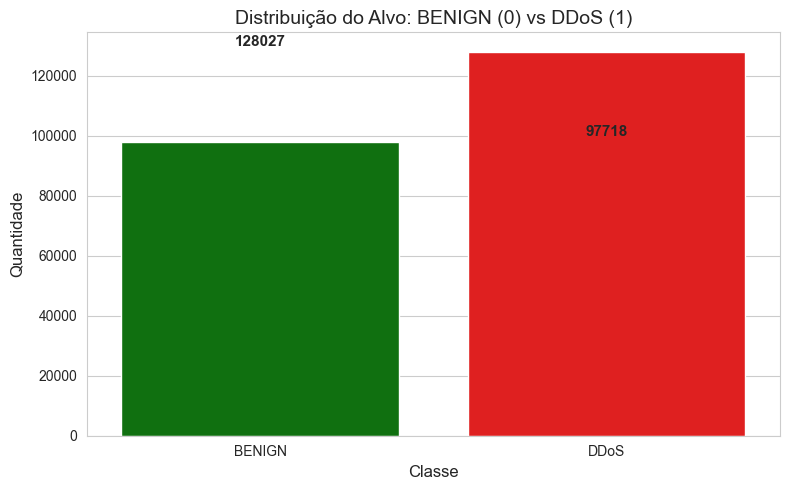

In [28]:
# Contar a distribuição
target_counts = y.value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette=['green', 'red'])
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.title('Distribuição do Alvo: BENIGN (0) vs DDoS (1)', fontsize=14)
plt.xticks([0, 1], ['BENIGN', 'DDoS'])

# Adicionar valores em cima das barras
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 2000, str(v), ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


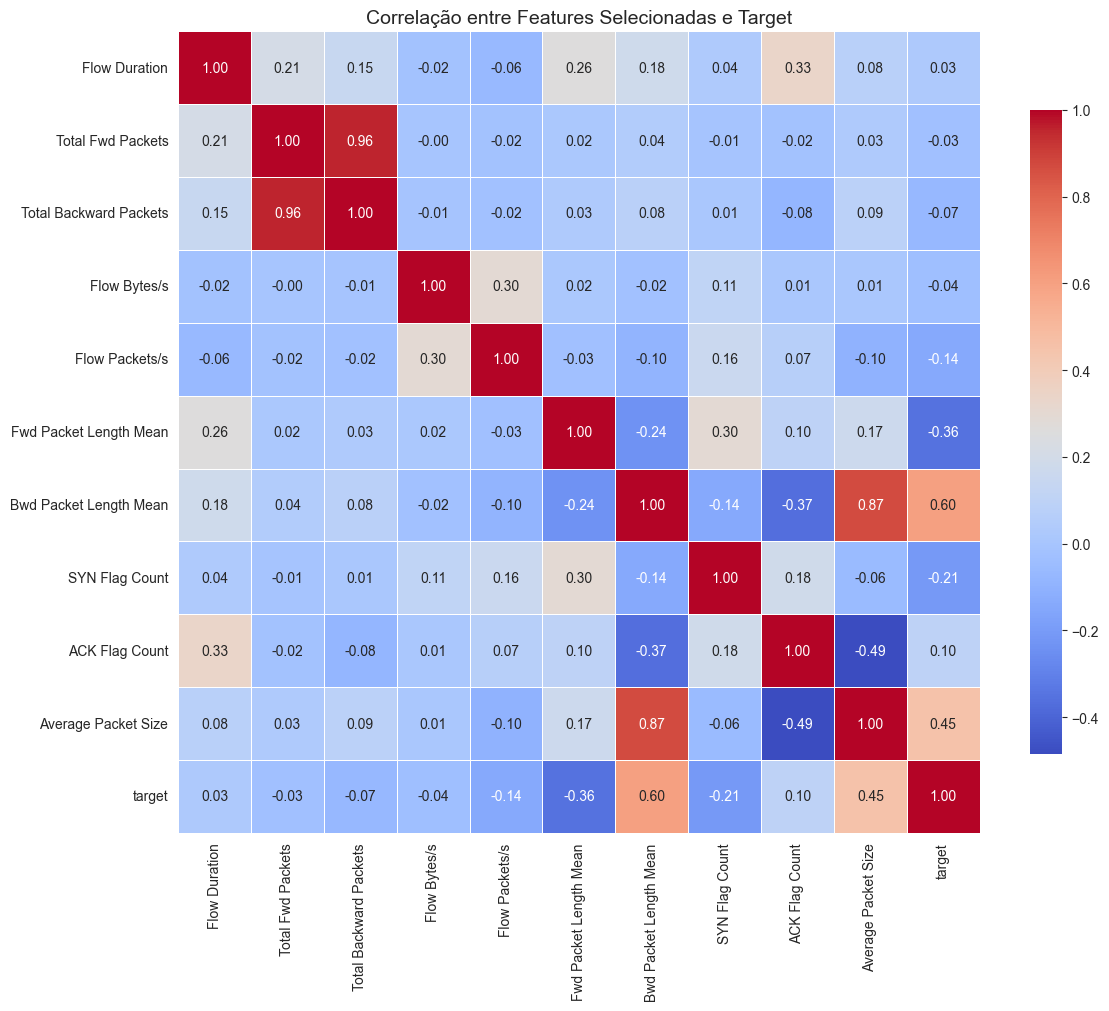

In [29]:
# Selecionar algumas features importantes para visualizar correlação
important_features = [
    'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Flow Bytes/s', 'Flow Packets/s', 'Fwd Packet Length Mean',
    'Bwd Packet Length Mean', 'SYN Flag Count', 'ACK Flag Count',
    'Average Packet Size'
]

# Criar subset com essas features + target
subset = df[important_features + ['target']]

# Calcular matriz de correlação
corr_matrix = subset.corr()

# Plotar heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlação entre Features Selecionadas e Target', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\Bernardo\AppData\Local\Temp\ipykernel_28560\2918943958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='Flow Duration', palette=['green', 'red'])


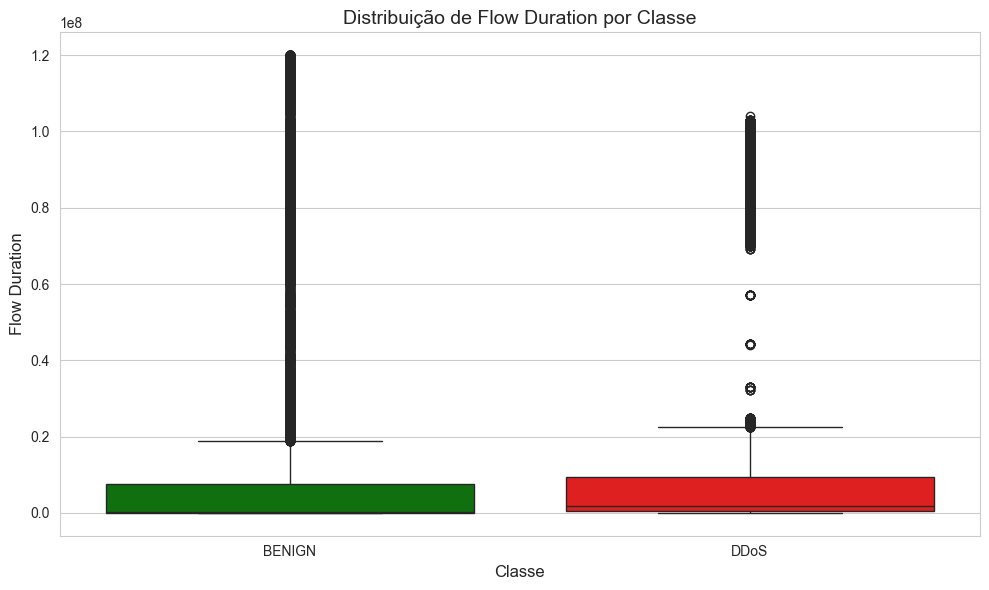

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='Flow Duration', palette=['green', 'red'])
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Flow Duration', fontsize=12)
plt.title('Distribuição de Flow Duration por Classe', fontsize=14)
plt.xticks([0, 1], ['BENIGN', 'DDoS'])
plt.tight_layout()
plt.show()


In [31]:
# Ver estatísticas descritivas das features importantes, separadas por classe
summary = df.groupby('target')[important_features].describe().T

print("Resumo Estatístico das Features Principais por Classe")
print("="*70)
summary


Resumo Estatístico das Features Principais por Classe


c:\Users\Bernardo\Desktop\portfolio-ia-cybersecurity\06-alert-prioritization\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Bernardo\Desktop\portfolio-ia-cybersecurity\06-alert-prioritization\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Bernardo\Desktop\portfolio-ia-cybersecurity\06-alert-prioritization\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Bernardo\Desktop\portfolio-ia-cybersecurity\06-alert-prioritization\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


target                                0             1
Flow Duration       count  9.771800e+04  1.280270e+05
                    mean   1.530626e+07  1.695559e+07
                    std    3.215873e+07  3.101261e+07
                    min   -1.000000e+00  0.000000e+00
                    25%    3.130000e+02  6.130930e+05
...                                 ...           ...
Average Packet Size min    0.000000e+00  3.000000e+00
                    25%    9.000000e+00  7.500000e+00
                    50%    7.750000e+01  8.976154e+02
                    75%    2.720769e+02  1.453375e+03
                    max    2.528000e+03  2.324200e+03

[80 rows x 2 columns]

## Conclusões do EDA

### 1. Estrutura do Dataset
- Total de **225.745 fluxos de rede**
- **85 colunas** no total, sendo:
  - 80 features numéricas
  - algumas colunas categóricas (`Flow ID`, IPs, `Timestamp`, `Label`)
- Nenhum valor faltante nas colunas: dataset bem limpo para modelagem

### 2. Distribuição das Classes
- `BENIGN` (0): 97.718 fluxos (~43,3%)
- `DDoS` (1): 128.027 fluxos (~56,7%)
- Dataset levemente desbalanceado, mas sem desequilíbrio extremo

### 3. Padrões nas Features
- Features de tráfego como `Flow Duration`, `Total Fwd Packets`, `Flow Bytes/s`, `Flow Packets/s` e `Average Packet Size`
  apresentam **distribuições diferentes entre BENIGN e DDoS**.
- O heatmap de correlação mostrou que algumas dessas features têm relação relevante com o `target`.
- O boxplot de `Flow Duration` evidencia diferenças claras entre tráfego benigno e ataques DDoS.

### 4. Decisão para Modelagem
- Vamos usar, inicialmente, **apenas as features numéricas** como entrada do modelo (`X`).
- O alvo (`y`) será a coluna binária `target`:
  - `0` = BENIGN (baixa prioridade)
  - `1` = DDoS (alta prioridade)

### 5. Próximos Passos
- Criar o notebook `02_modelagem.ipynb`.
- Dividir os dados em treino e teste (train/test split).
- Treinar um modelo de classificação (por exemplo, árvore de decisão, Random Forest, XGBoost ou LightGBM).
- Avaliar métricas como precision, recall, F1-score e ROC AUC, com foco em:
  - **priorizar detecção de DDoS**
  - **minimizar falsos negativos** (ataques que passam como BENIGN)
